In [1]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

C:\Users\PRANAV\Desktop\crater\yolov9


Cloning into 'yolov9'...
  error: subprocess-exited-with-error
  
  exit code: 1
  
  [17 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-312
  creating build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-312\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-312\pycocotools
  running build_ext
  C:\Users\PRANAV\AppData\Local\Temp\pip-build-env-jb62x7wc\overlay\Lib\site-packages\Cython\Compiler\Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: C:\Users\PRANAV\AppData\Local\Temp\pip-install-ycjcpkzf\pycocotools_4f7a53b190e941a98c1e087c614fd6d9\pycocotools\_mask.pyx
    tree = Pars

In [ ]:
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")
project = rf.workspace("ml-1iqv7").project("lunar-crater-detection-cwbir")
version = project.version(6)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!python train.py --img 640 --epochs 100 --data /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/data.yaml --cfg /content/drive/MyDrive/sip/yolov9/models/detect/gelan-c.yaml --weights /content/drive/MyDrive/sip/yolov9/weights/gelan-c.pt --batch-size 16 --hyp /content/drive/MyDrive/sip/yolov9/data/hyps/hyp.scratch-high.yaml

2024-06-10 14:02:46.544931: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-10 14:02:46.544980: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-10 14:02:46.546339: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-10 14:02:46.554295: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-10 14:02:47.982512: W tensorflow/comp

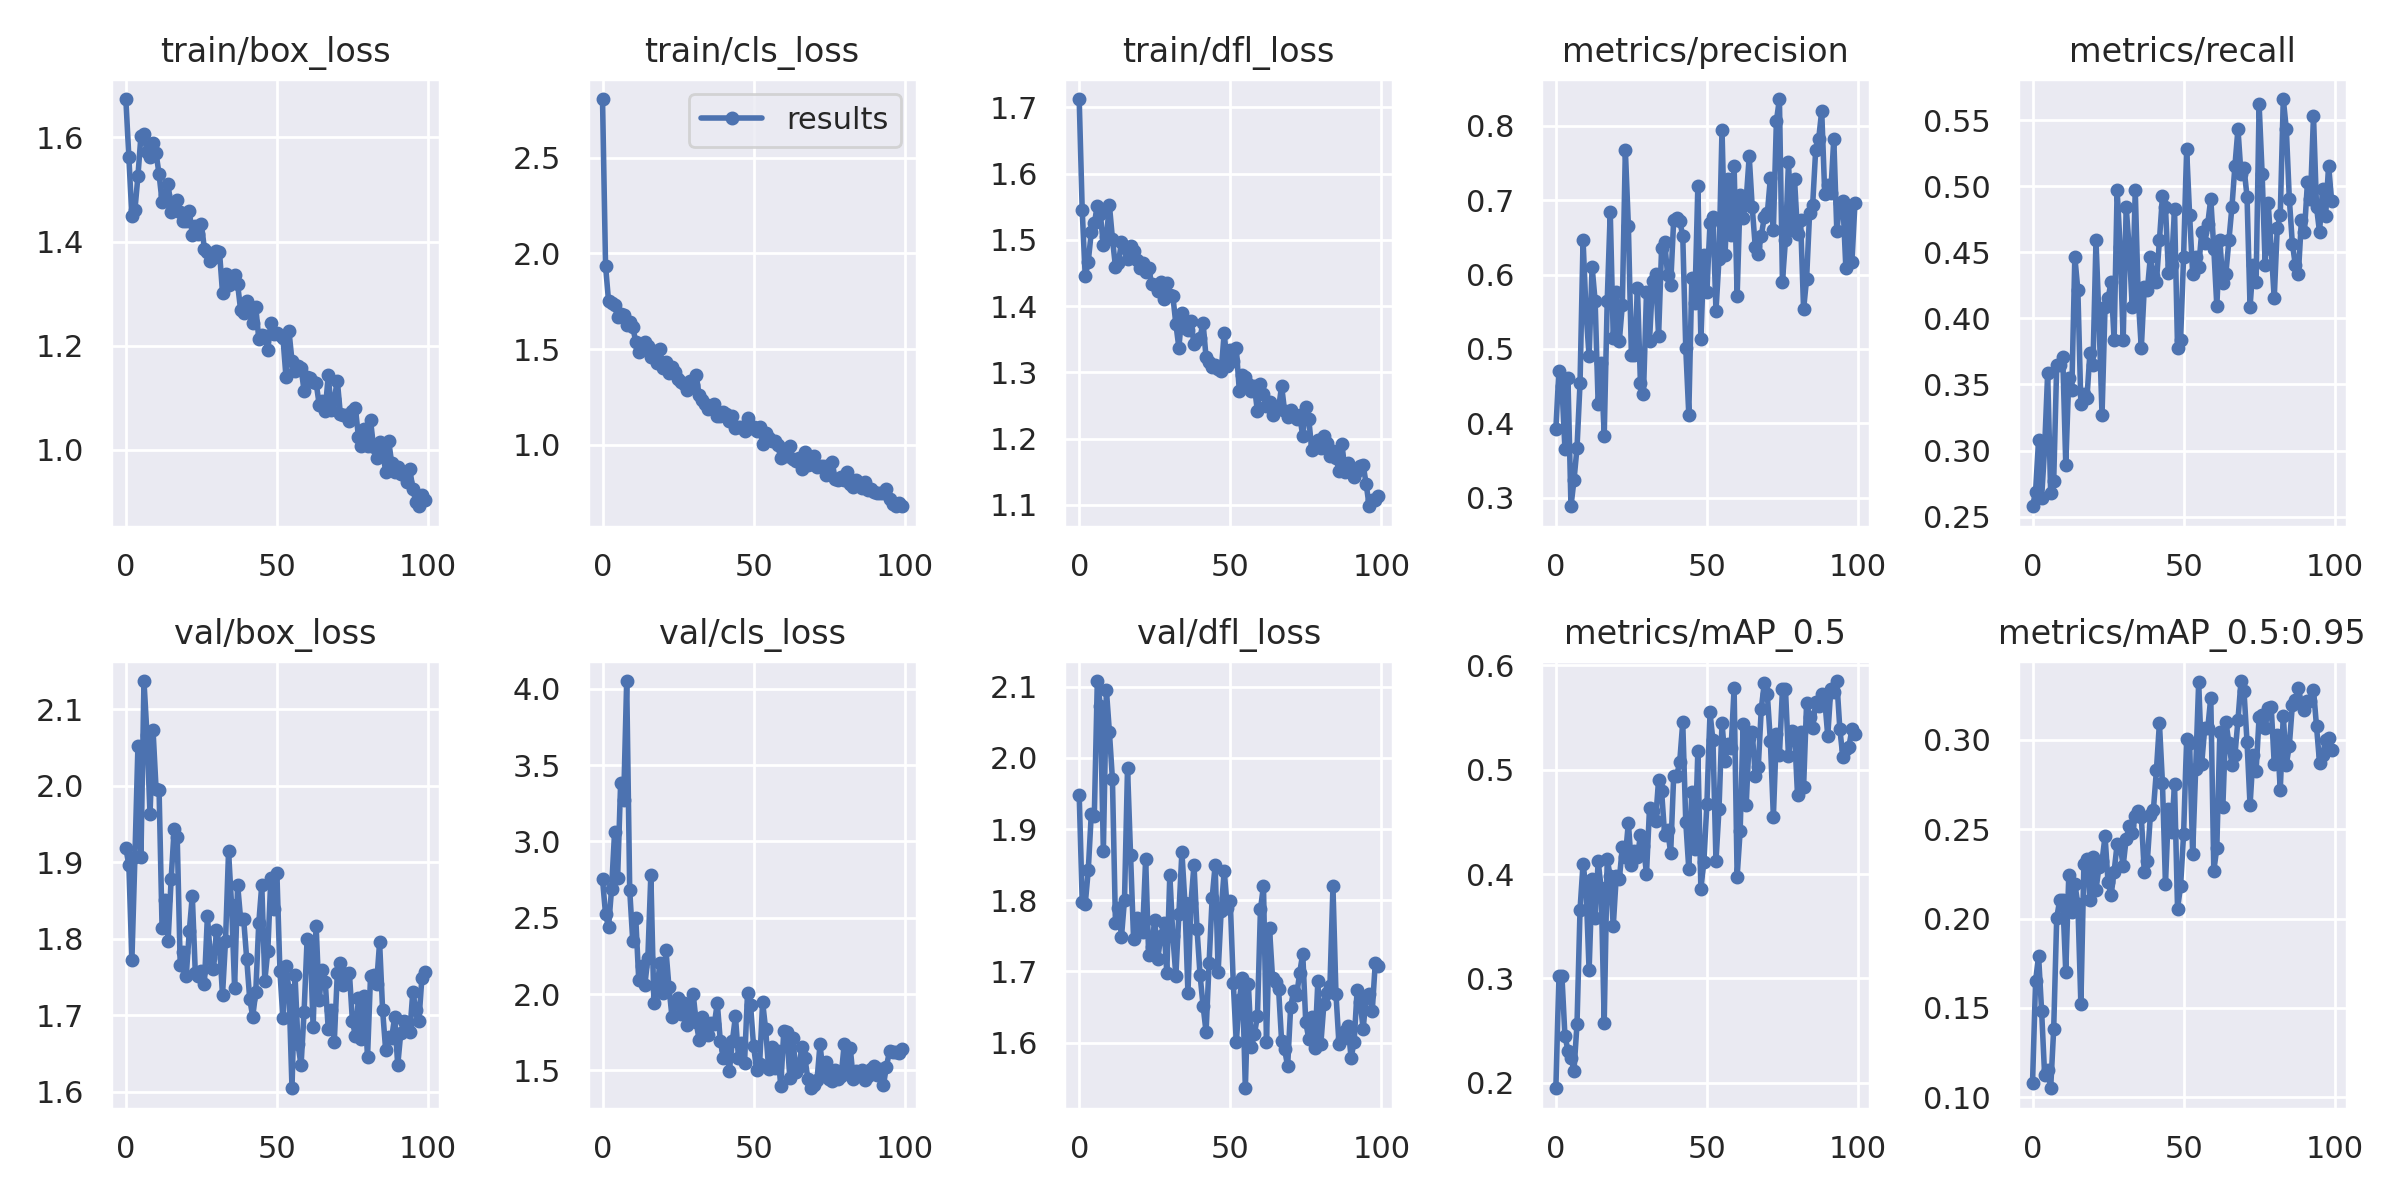

In [ ]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/sip/yolov9/runs/train/exp/results.png", width=1000)

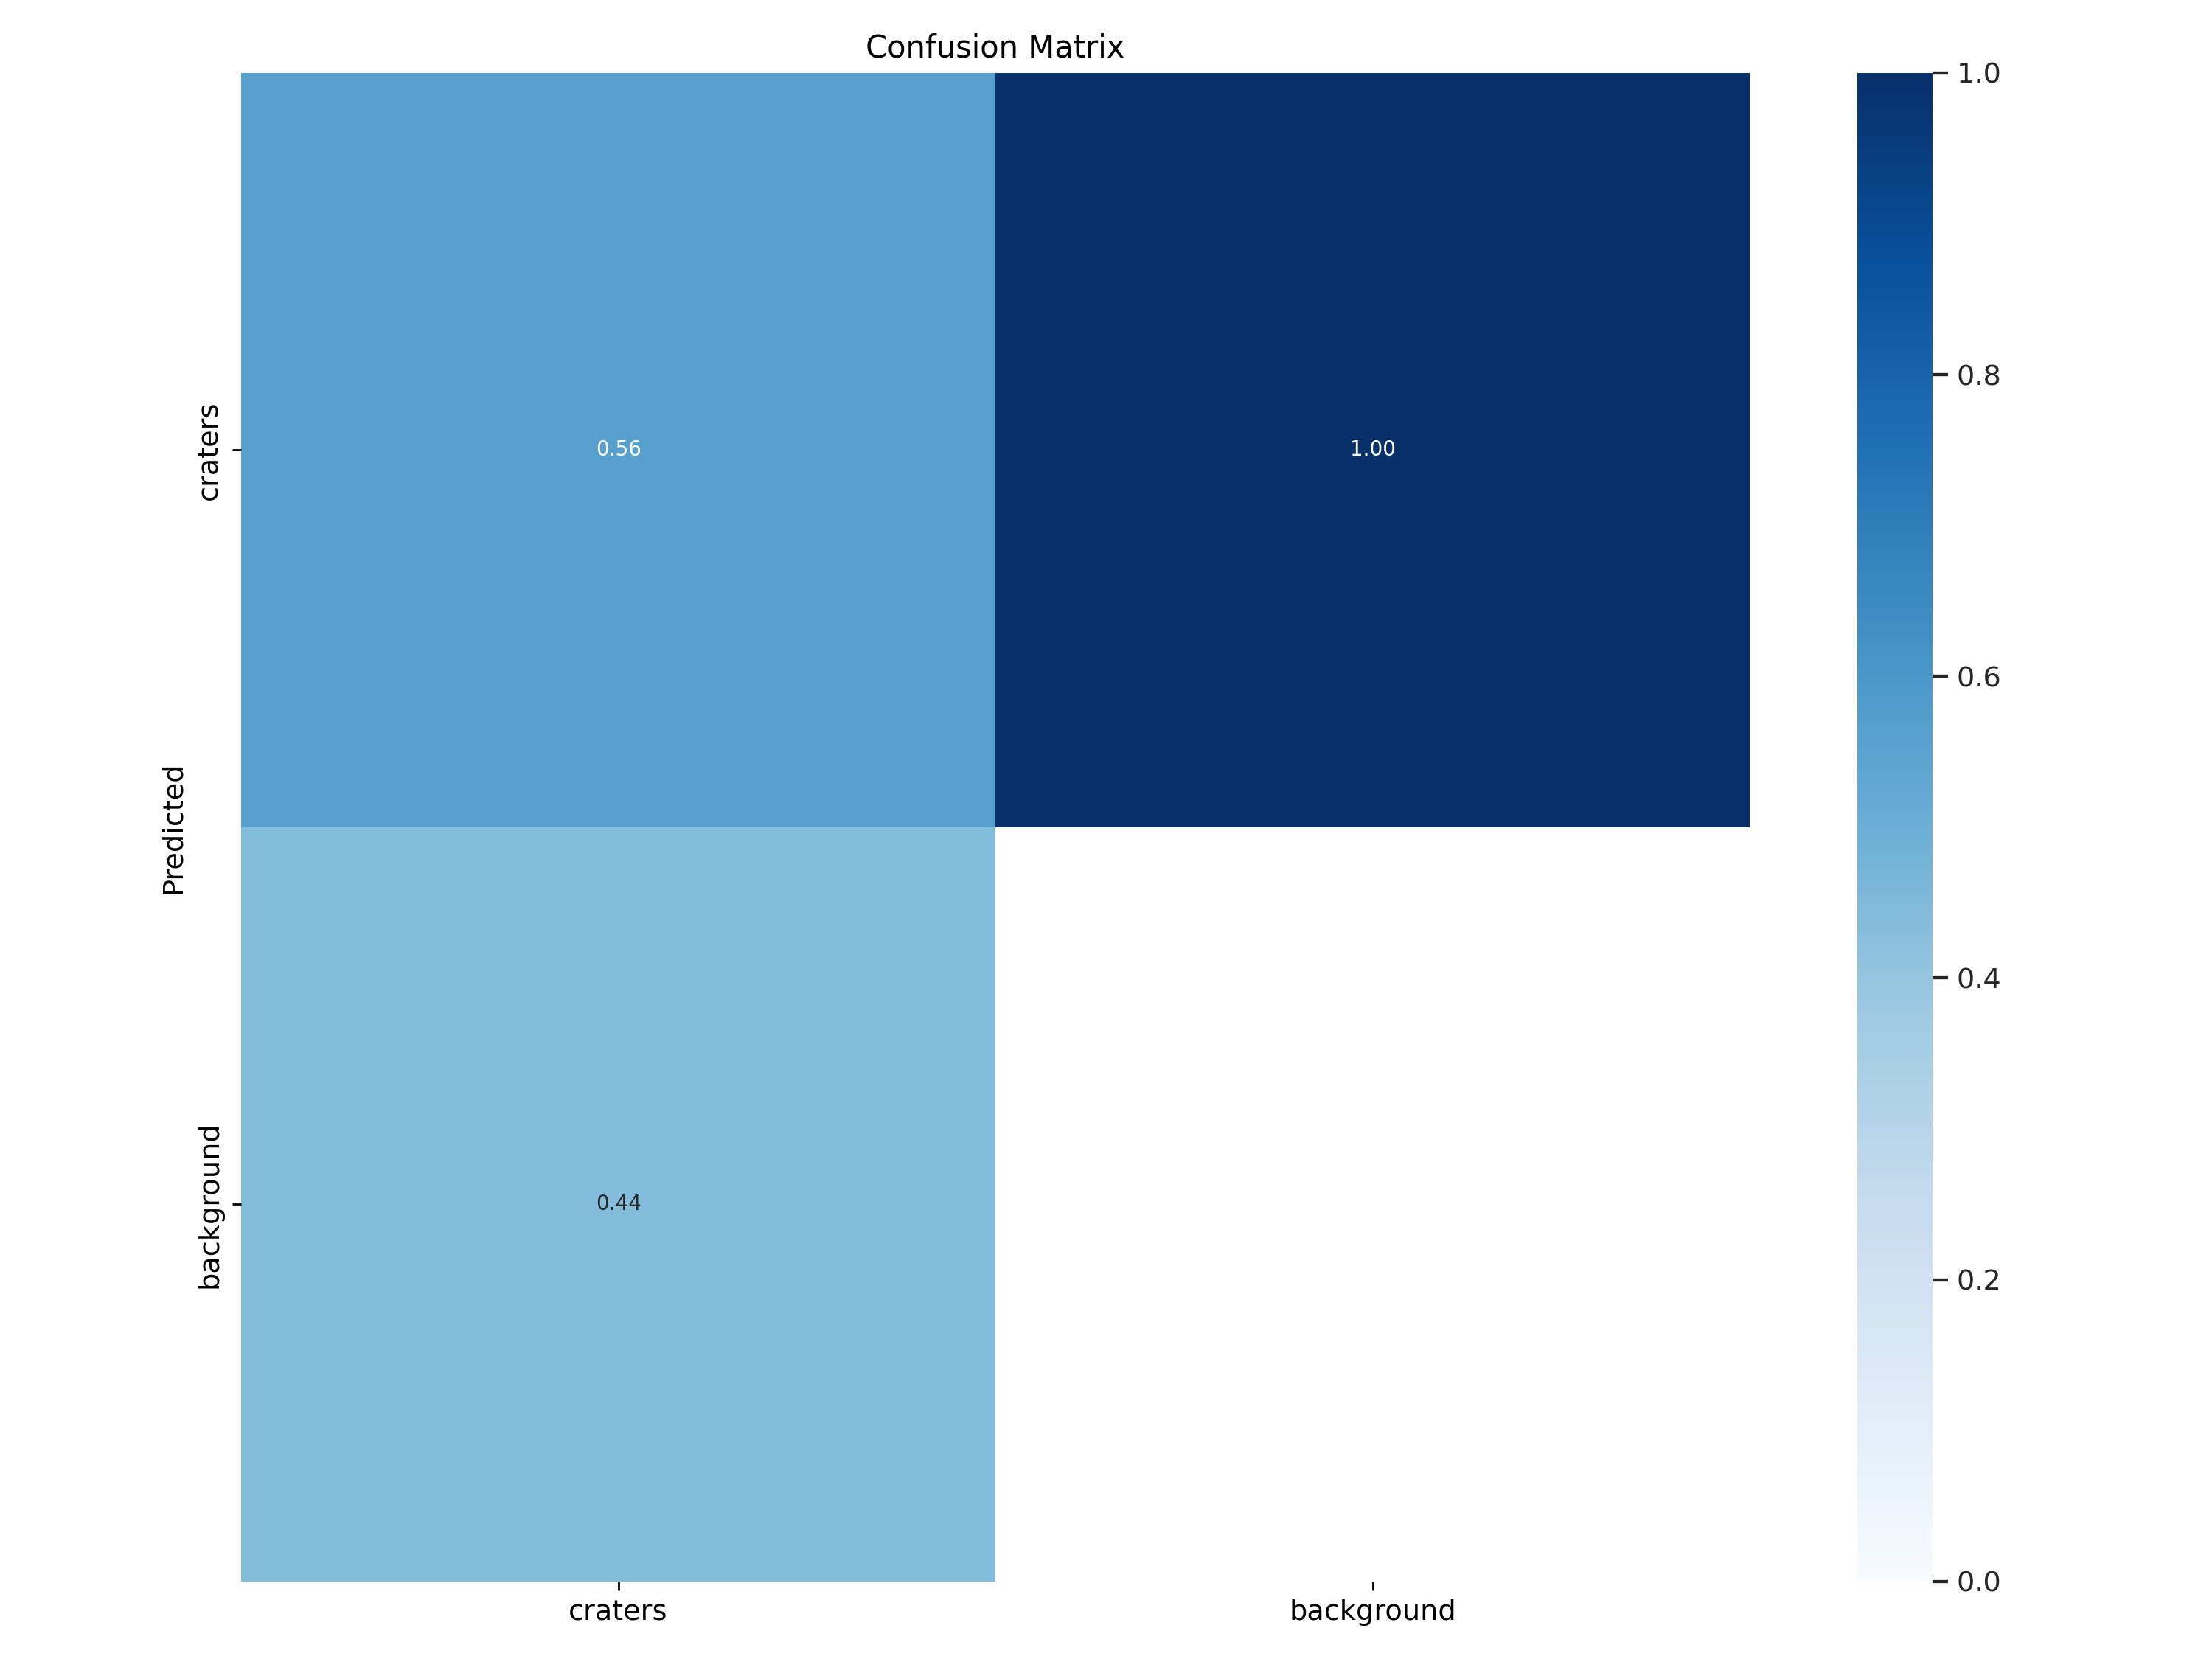

In [ ]:
from IPython.display import Image

Image(filename="/content/drive/MyDrive/sip/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

In [ ]:
!python val.py --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 --data {dataset.location}/data.yaml --weights /content/drive/MyDrive/sip/yolov9/runs/train/exp/weights/best.pt


val: data=/content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/data.yaml, weights=['/content/drive/MyDrive/sip/yolov9/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/valid/labels.cache... 57 images, 7 backgrounds, 0 corrupt: 100% 57/57 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 2/2 [00:06<00:00,  3.12s/it]
                   all         57        159      0.675      0.503       0.58      0.3

In [ ]:
!python detect.py --weights /content/drive/MyDrive/sip/yolov9/runs/train/exp/weights/best.pt --source /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/test/images --data /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/data.yaml --imgsz 640 640 --conf-thres 0.05 --iou-thres 0.65 --max-det 1000 --save-txt --project runs/detect --name exp --line-thickness 2 --hide-labels


detect: weights=['/content/drive/MyDrive/sip/yolov9/runs/train/exp/weights/best.pt'], source=/content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/test/images, data=/content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/data.yaml, imgsz=[640, 640], conf_thres=0.05, iou_thres=0.65, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=2, hide_labels=True, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25411731 parameters, 0 gradients, 102.5 GFLOPs
image 1/9 /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/test/images/1_hh.PNG: 640x320 93 craterss, 125.6ms
image 2/9 /content/drive/MyDrive/sip/yolov9/Lunar-crater-detection-6/test/images/1_hv.PNG: 640x448

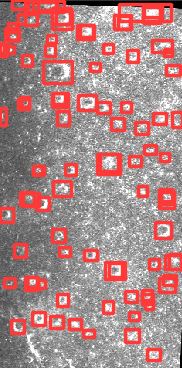

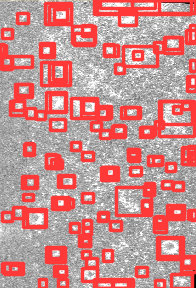

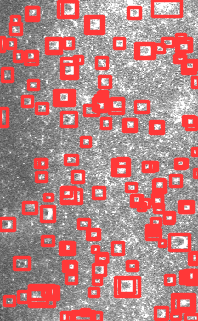

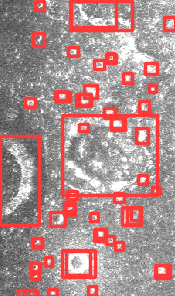

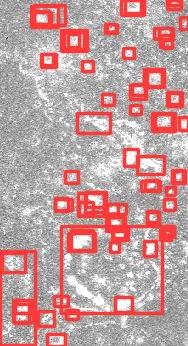

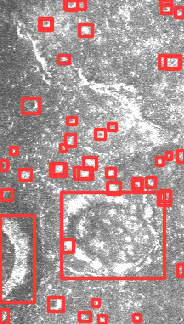

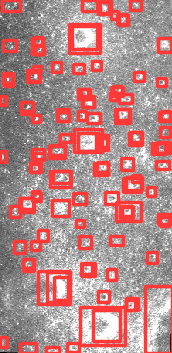

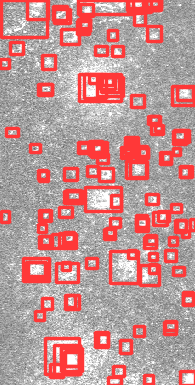

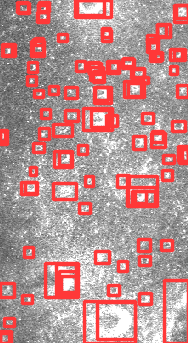

In [ ]:
import glob
from IPython.display import Image, display
i=0
for imageName in glob.glob('/content/drive/MyDrive/sip/yolov9/runs/detect/exp9/*.PNG'):
  i+=1
  if i<=10:
    display(Image(filename=imageName))
    print('\n')